## VOLATILITY STUDY

In the directory, you are given four asset prices historical data at a granularity of one minute (data_challenge.pkl).
The purpose of this study is to analyze the historical volatility of these four assets, and forecast one day ahead volatility to give your trader an indication of what strategies he should use tommorrow. 

# Part 1

1.1) Extract the data from the pickled file, and plot the time series. 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt 
from arch import arch_model 
from scipy.stats import skew, kurtosis
import scipy.stats as stats

In [59]:
#------------- Extract the data here -------------
df = pd.read_pickle("data_challenge.pkl")

In [60]:
print(df.columns)
df.head()

Index(['MSFT', 'U', 'DKNG', 'AAPL'], dtype='object')


,MSFT,U,DKNG,AAPL
Datetime,,,,
2023-12-15 09:30:00-05:00,367.940002,38.405998,36.070000,197.250000
2023-12-15 09:35:00-05:00,370.820007,38.360001,35.900002,197.697998
2023-12-15 09:40:00-05:00,370.709991,38.465000,36.130001,197.929993
2023-12-15 09:45:00-05:00,368.740692,38.518002,35.889999,197.639999
2023-12-15 09:50:00-05:00,369.109985,38.810001,36.083000,197.604996


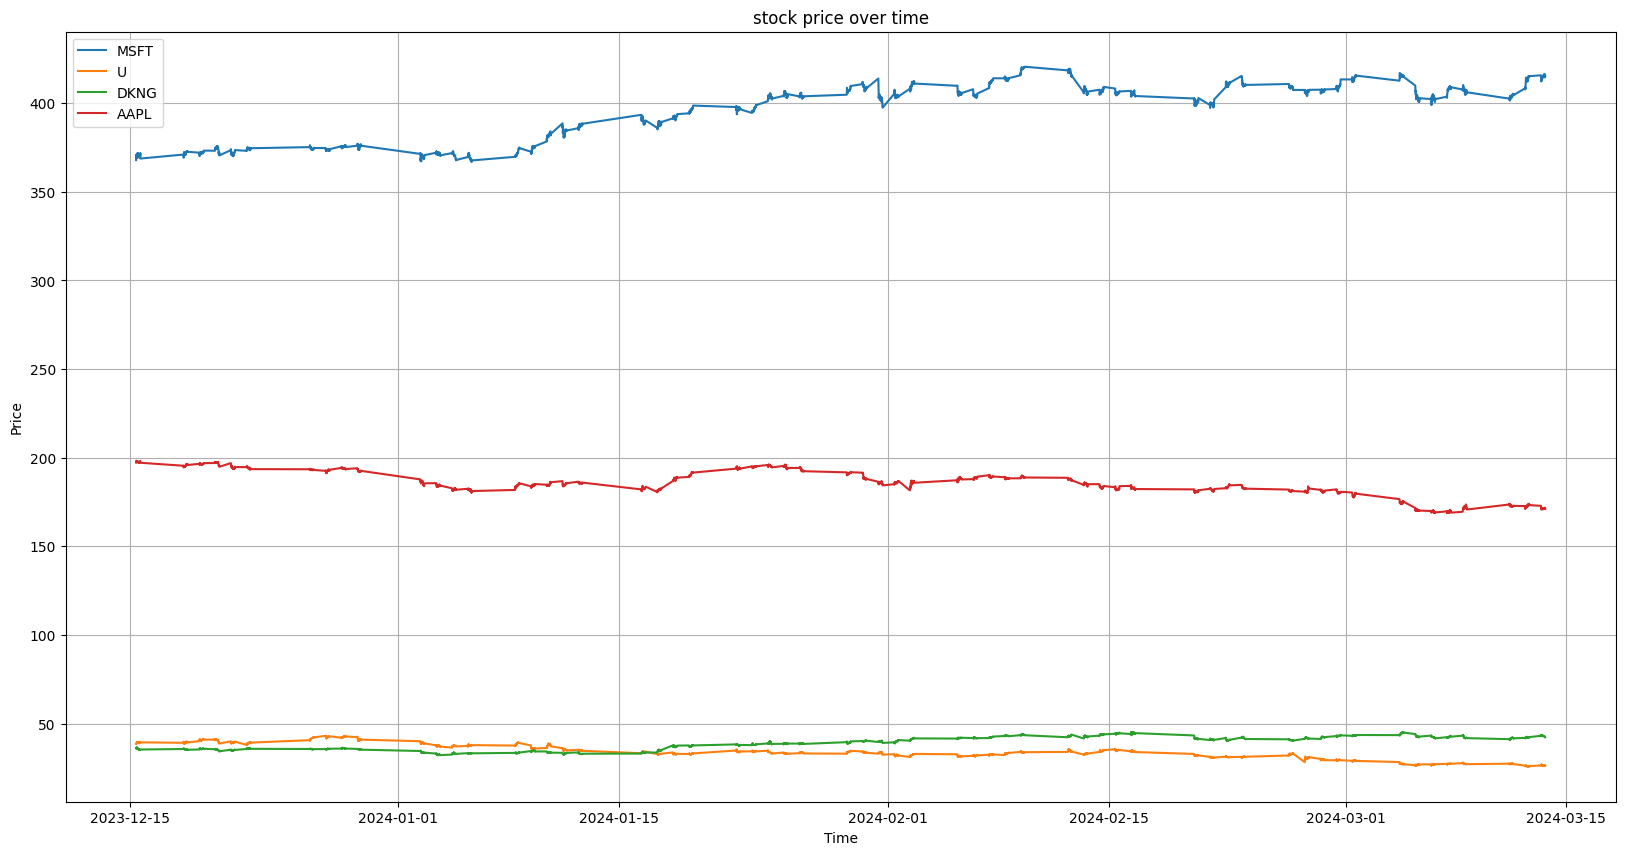

In [61]:
#------------------Plot data----------------------
plt.figure(figsize=[20,10])
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title("stock price over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

1.2) Convert the dataframe to minute returns (percentage, log, ... choose yourself). Then give an overview of each of the descriptive statistics for each of the assets' return. In particular, provide the first four moments and the 25th, 50th, and 75th quantiles.


In [62]:
#----------- Convert to returns here -------------
df=df.pct_change().dropna() #returns in pourcentage

/var/folders/1v/wdljqpm957b86d_74y1bhkjh0000gn/T/ipykernel_72576/2656063292.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df=df.pct_change().dropna() #returns in pourcentage


In [63]:
#-------- Compute and print the stats here -------
descriptive_stats={}

for column in df.columns:
    
    descriptive_stats[column]={
        "skewness": skew(df[column]),
        "kurtosis": kurtosis(df[column]),
    }

stats_df=pd.concat([df.describe(),pd.DataFrame(descriptive_stats)])
print(stats_df)

#-------------------------------------------------

                 MSFT            U         DKNG         AAPL
count     4672.000000  4672.000000  4672.000000  4672.000000
mean         0.000027    -0.000071     0.000039    -0.000029
std          0.001307     0.004572     0.003220     0.001455
min         -0.021732    -0.147335    -0.046549    -0.028586
25%         -0.000460    -0.001599    -0.001314    -0.000534
50%          0.000039     0.000000     0.000000     0.000024
75%          0.000568     0.001645     0.001295     0.000544
max          0.019600     0.048898     0.075289     0.022720
skewness     0.458790    -7.883782     2.507053    -3.500611
kurtosis    50.904140   246.069345    84.381281    92.959359


1.3.1) Which distribution among: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Normal distribution <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- T-student distribution <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Cauchy distribution <br>
fits the data best? Please back your choice by statistical tests, and describe your results briefly.


In [64]:
#------ Compute and print test results here ------
"""We use a Kolmogorov-Smirnov test to see which distribution fits best"""
k2, p_val_normal=stats.kstest(df,'norm')
print(f'Normal distribution Kolmogorov-Smirnov : {k2}, p-value={p_val_normal} ')
#stats.kstest()
k2, p_val_tstudent=stats.kstest(df, 't', args=stats.t.fit(df))
print(f'T-Student distribution Kolmogorov-Smirnov : {k2}, p-value={p_val_tstudent} ')

k2, p_val_cauchy=stats.kstest(df, 'cauchy', args=stats.cauchy.fit(df))
print(f'Cauchy distribution Kolmogorov-Smirnov : {k2}, p-value={p_val_cauchy} ')
#-------------------------------------------------

Normal distribution Kolmogorov-Smirnov : [0.49554207 0.49030158 0.49231217 0.49625957], p-value=[0. 0. 0. 0.] 
T-Student distribution Kolmogorov-Smirnov : [0.10856394 0.12157513 0.08441929 0.10288355], p-value=[2.07507628e-48 1.23010146e-60 2.05015852e-29 1.64834381e-43] 
Cauchy distribution Kolmogorov-Smirnov : [0.10466511 0.12255387 0.09282477 0.10088194], p-value=[5.11502188e-45 1.29892100e-61 1.74812486e-35 7.59225345e-42] 


Please, describe briefly the results obtained in this blank space: <br>
--------------------------------------------------------------------------------------------<br>

We obtain small p-values for each test, which might indicate the need for further cleaning. The Normal
distribution test yields the smallest p-values for each asset, but the largest "distance" from the 
theoretical distribution. Since the p-values are low enough, we will then make our decisions based on 
which test yields the lowest k2.

--------------------------------------------------------------------------------------------<br>

1.3.2) Build a function that plots a theoretical distribution against the empirical distribution of a specific asset. Plot the distribution that you consider the best. 

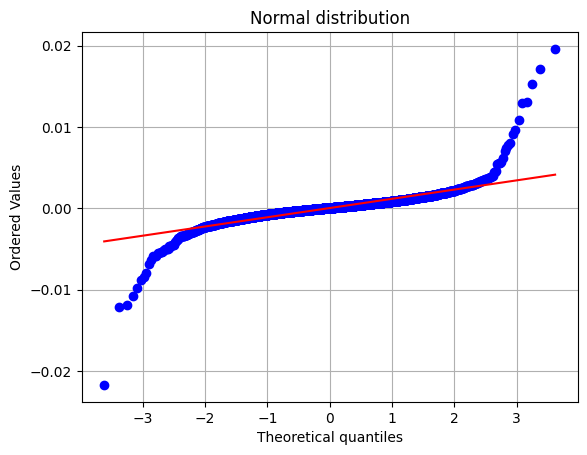

0

In [65]:
#------ Define plotting function here ------------
def distribution_plot(returns: pd.Series, distribution: str = 'norm'):
        """
        Empirical distribution is plotted against theoretical one.

        Inputs:
        - returns: pd.Series containing the historical returns of the specific asset. 
        - distribution: string defining the theoretical distribution to fit to data. 

        Returns:
        - plt.plot: Empirical vs Theoretical distribution.
        """

        if distribution == 'norm':
           stats.probplot(returns, dist="norm", plot=plt)
           plt.title("Normal distribution")
           plt.grid(True)
           plt.show()
           
        elif distribution == 't':
            stats.probplot(returns, dist="t", sparams=(df[column],), plot=plt)
            plt.title("T-Student distribution")
            plt.grid(True)
            plt.show()
           
        elif distribution == 'cauchy':
           stats.probplot(returns, dist="cauchy", plot=plt)
           plt.title("Cauchy distribution")
           plt.grid(True)
           plt.show()
           
        else:
            raise ValueError("Distribution not available. Choose among 'norm', 't', 'cauchy'.")
        
        return 0
#-------------------------------------------------

distribution_plot(df[df.columns[0]],'norm')

1.4) The following QQ plot tests the empirical distribution of one of the assets against a normal distribution. What can you infer about the tails of the empirical distributions by looking at the plot? <br>
<div style="text-align:center">
    <img src="QQ.png" alt="Distribution Plot" />
</div>

Please, write your answer in this blank space: <br>
--------------------------------------------------------------------------------------------<br>

The tails are light: they are lighter than the theoretical distribution ("frown pattern")

--------------------------------------------------------------------------------------------<br>

1.5) Are the time series stationary? 

In [75]:
#------------- Study stationarity here -----------
from statsmodels.tsa.stattools import adfuller

adf_result=adfuller(df[df.columns[0]])
print(adf_result[0])
print(f'p-vals: {adf_result[1]}')

for key, val in adf_result[4].items():
    print((key,val))
#-------------------------------------------------

-70.0625925899846
p-vals: 0.0
('1%', -3.431750748726974)
('5%', -2.862158969873513)
('10%', -2.5670994800621187)


Please, describe briefly the results obtained in this blank space: <br>
--------------------------------------------------------------------------------------------<br>

The p-value indicates that we can reject the null hypothesis and that the TS is likely to be 
stationary ("constant stat properties over time")

--------------------------------------------------------------------------------------------<br>

# Part 2

2.1.1) Fit a GARCH(1, 1) model to each of the assets. Then, choose an asset and plot the historical path of volatility for it. <br>

In [69]:
#--------- Compute the GARCH model here ----------
garch_models={}

#for column in df.columns:
#    model=arch_model(df[column],p=1,q=1)
#    res=model.fit(update_freq=5, disp='off')
#    garch_models[column]=res

model=arch_model(df[df.columns[0]],p=1,q=1)
res=model.fit(update_freq=5, disp='off')
garch_models[df.columns[0]]=res

#-------------------------------------------------

/Users/manu/PycharmProjects/OTCFlow/.venv/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.708e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/manu/PycharmProjects/OTCFlow/.venv/lib/python3.10/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


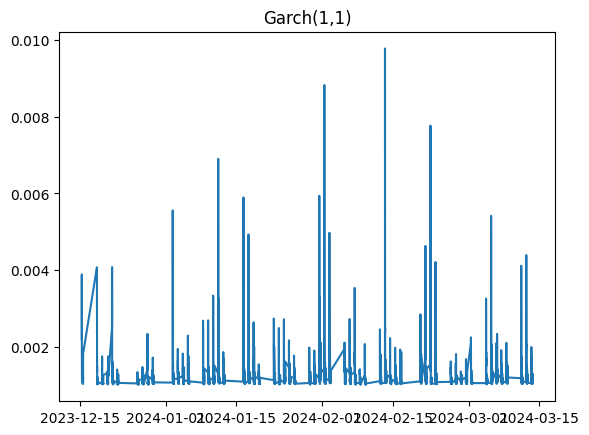

In [72]:
#-- Plot GARCH fitted historical volatility here -
conditional_volatility=garch_models[df.columns[0]].conditional_volatility

plt.plot(conditional_volatility, label='Historical volatility')
plt.title("Garch(1,1)")
plt.show()
#-------------------------------------------------

2.1.2) The trader is asking you what you think volatility will be tomorrow. Forecast the volatility of the selected asset for the day immediately after the last day of the data set and print it.

In [73]:
#-- Forecast and print tomorrow volatility here --
forecast=garch_models[df.columns[0]].forecast(horizon=1)

next_day_vol=forecast.variance.iloc[-1].values[0]**0.5

print(next_day_vol)
#-------------------------------------------------

0.0012285567175506088


Let's, now, suppose you have two ways of forecasting volatility for tomorrow: <br>
- 5 minutes realized volatility of today is used as expected value of tomorrow volatility as <br> <br>
        <center>
         $ E[\sigma_{t+1}] = \sigma_{t}^{RV, 5min}$ 
        </center> <br>
- Using the GARCH(1,1) you estimated to forecast tomorrow volatility. <br> <br> <br>

2.2.1) How would you compare the performance of the two methods? Which criteria would you use?

Please, provide an anwer in this blank space: <br>
--------------------------------------------------------------------------------------------<br>
I would use accuracy measure to compare the forecasts with actual values, namely the mean absolute error,
the mean squared error and the root mean squared error. Log-likelihood is also a suited measure to compare the models 
(higher value= better fit, whereas the other measures are better when lower).
Let's use the latter here. 


--------------------------------------------------------------------------------------------<br>

2.2.2) Given the criteria choosen, how does your model perform compared to the benchmark of the previous day 5 minutes realized volatility? Which one appears to be the most reliable?


In [1]:
#--------- Compare the two methodologies here ----------
garch_loglikelihood=garch_models[df.columns[0]].loglikelihood
print(garch_loglikelihood)
#-------------------------------------------------------